# Импорт библиотек

In [3]:
import pandas as pd
import numpy as np


Загрузка данных

In [4]:
train_data = pd.read_excel('data/train.xlsx')
test_data = pd.read_excel('data/test.xlsx')


Анализ стационарности для train данных:


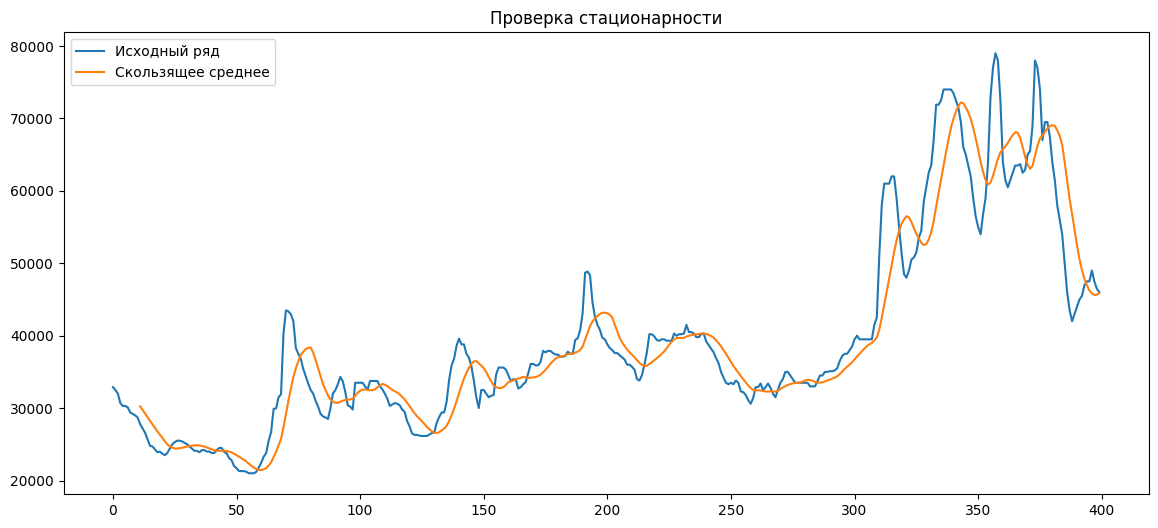

ADF Statistic: -1.9258699893713453
p-value: 0.3199906102569917
Critical Values:
	1%: -3.4470566389664703
	5%: -2.8689037160476016
	10%: -2.570692663557422

Ряд нестационарный - применяем дифференцирование


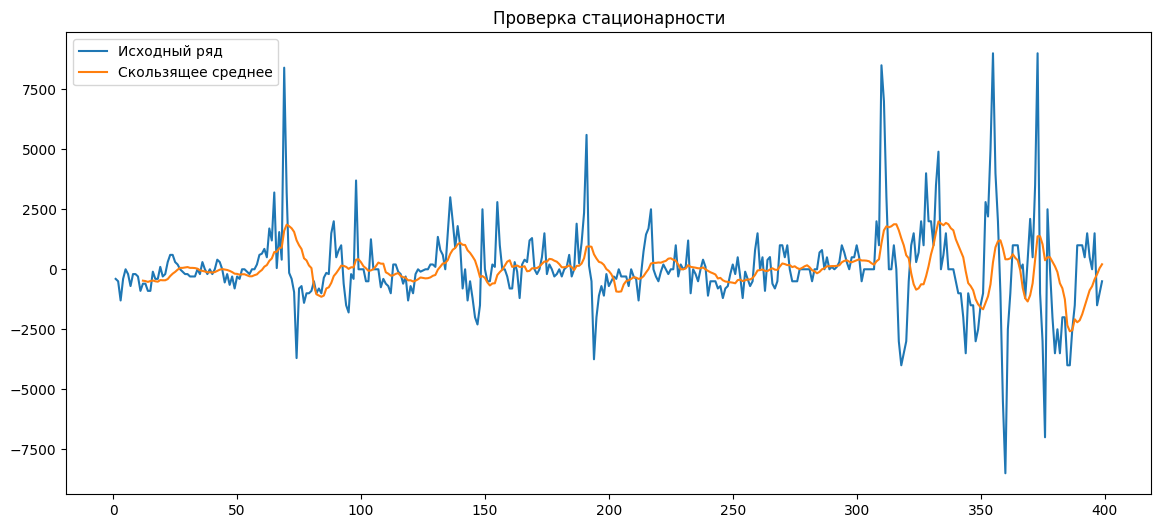

ADF Statistic: -7.7060615041152065
p-value: 1.3006938373810178e-11
Critical Values:
	1%: -3.447405233596701
	5%: -2.8690569369014605
	10%: -2.5707743450830893


In [ ]:
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt

# target_col = 'Цена на арматуру'

# def check_stationarity(series, window=12):
#     """
#     Проверка стационарности временного ряда с визуализацией
#     """
#     # Расчёт скользящей статистики
#     rolling_mean = series.rolling(window=window).mean()
#     rolling_std = series.rolling(window=window).std()
    
#     # Визуализация
#     plt.figure(figsize=(14, 6))
#     plt.plot(series, label='Исходный ряд')
#     plt.plot(rolling_mean, label='Скользящее среднее')
#     plt.legend()
#     plt.title('Проверка стационарности')
#     plt.show()
    
#     # Тест Дики-Фуллера
#     result = adfuller(series)
#     print('ADF Statistic:', result[0])
#     print('p-value:', result[1])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print(f'\t{key}: {value}')
    
#     return result[1] > 0.05  # Возвращает True если ряд нестационарный

# # Проверяем train данные
# print("Анализ стационарности для train данных:")
# is_non_stationary = check_stationarity(train_data[target_col])

# if is_non_stationary:
#     print("\nРяд нестационарный - применяем дифференцирование")
#     train_data['Цена_diff'] = train_data[target_col].diff().dropna()
#     _ = check_stationarity(train_data['Цена_diff'].dropna())
# else:
#     print("\nРяд стационарный - преобразования не требуются")


Анализ автокорреляции:


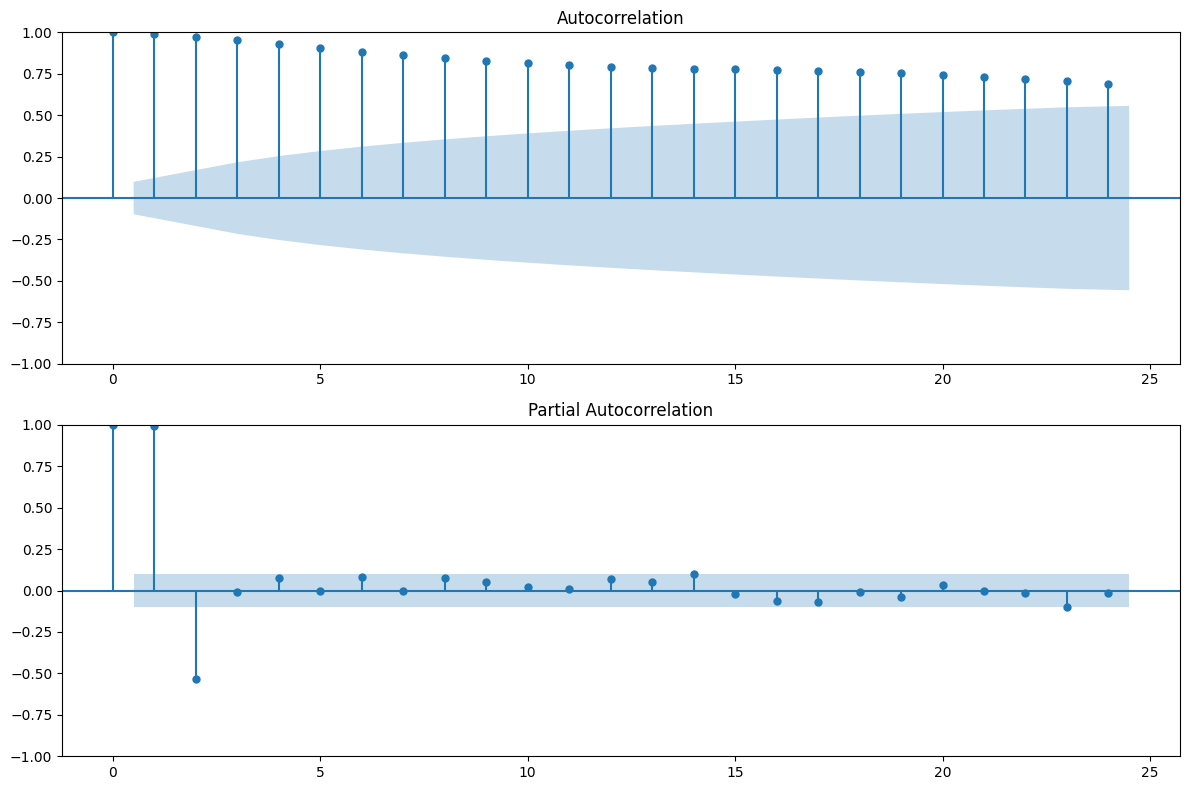

In [11]:
def plot_correlation(series, lags=24):
    """
    Построение графиков ACF и PACF
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(series, lags=lags, ax=ax1)
    plot_pacf(series, lags=lags, ax=ax2)
    plt.tight_layout()
    plt.show()
target_col = 'Цена на арматуру'
print("\nАнализ автокорреляции:")
plot_correlation(train_data[target_col])

In [12]:
target_col = 'Цена на арматуру'  # Теперь переменная доступна во всем коде
X_train = train_data.drop(target_col, axis=1)
y_train = train_data[target_col]
X_test = test_data.drop(target_col, axis=1)

In [13]:
print(f"Train: {train_data.columns.tolist()}")
print(f"Test: {test_data.columns.tolist()}")

Train: ['dt', 'Цена на арматуру', 'Цена_diff']
Test: ['dt', 'Цена на арматуру']


In [ ]:
# Для обучения
X_train = train_final.drop(['dt', 'Цена на арматуру'], axis=1)
y_train = train_final['Цена на арматуру']

# Для прогноза
X_test = test_processed.drop(['dt', 'Цена на арматуру'], axis=1)
dates_test = test_processed['dt']

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_13612\1723812940.py:1: SyntaxWarning: invalid escape sequence '\d'
  train_final = pd.read_csv("intensive3\data\price_data.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_13612\1723812940.py:1: SyntaxWarning: invalid escape sequence '\d'
  train_final = pd.read_csv("intensive3\data\price_data.csv")


NameError: name 'test_processed' is not defined

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train, order=(1,0,1))  # (p,d,q) - d=0, так как ряд уже стационарен
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:       Цена на арматуру   No. Observations:                  396
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3453.670
Date:                Tue, 25 Mar 2025   AIC                           6915.339
Time:                        20:54:19   BIC                           6931.265
Sample:                             0   HQIC                          6921.649
                                - 396                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.93e+04   1.07e+04      3.675      0.000    1.83e+04    6.03e+04
ar.L1          0.9860      0.007    136.323      0.000       0.972       1.000
ma.L1          0.4426      0.027     16.467      0.0

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


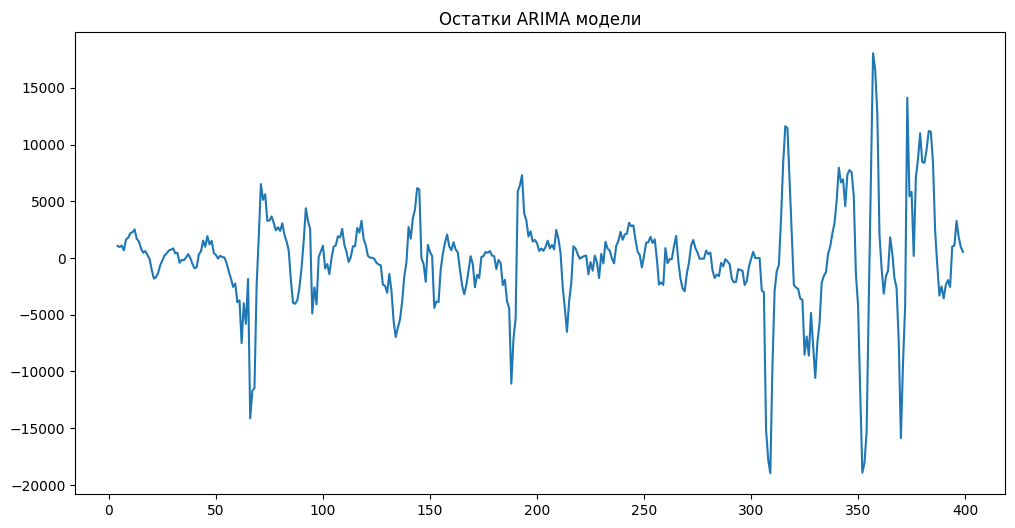

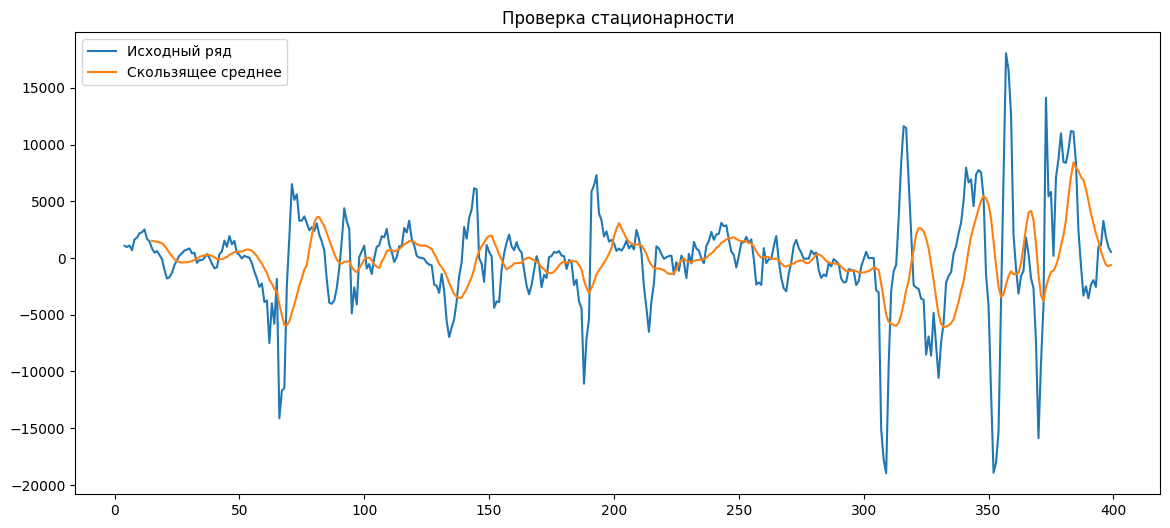

ADF Statistic: -5.5174830644600945
p-value: 1.9105051828451624e-06
Critical Values:
	1%: -3.4475850438570115
	5%: -2.869135963767125
	10%: -2.5708164748773332


False

In [ ]:
# Правильное получение прогнозов для ARIMA
arima_pred = result.get_prediction(start=X_train.index[0], end=X_train.index[-1])
residuals = y_train - arima_pred.predicted_mean
forecast = result.get_forecast(steps=12)

# Визуализация остатков
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Остатки ARIMA модели')
plt.show()

# Тест на стационарность остатков
check_stationarity(residuals)

In [ ]:
print("Ожидаемые признаки:", feature_columns)  #выводим ожидаемые моделью признаки и реальные колонки test_df для проверки их соответствия
print("Колонки test_df:", test_df.columns)

NameError: name 'feature_columns' is not defined

### Преобразование временных данных

In [ ]:
if "dt" in test_df.columns:
    test_df["dt"] = pd.to_datetime(test_df["dt"])
    test_df["year"] = test_df["dt"].dt.year
    test_df["month"] = test_df["dt"].dt.month
    test_df["day"] = test_df["dt"].dt.day
    test_df["week"] = test_df["dt"].dt.isocalendar().week

# Новые признаки на основе цены

In [ ]:
if "Цена на арматуру" in test_df.columns:
    test_df["Price_source"] = test_df["Цена на арматуру"].shift(1)  #цена на предыдущей неделе
    test_df["Price_Diff"] = test_df["Цена на арматуру"].diff()  #разница цены по сравнению с предыдущей неделей

# Дополнительный вывод информации

In [ ]:
feature_columns = model.feature_names_in_
print("Ожидаемые признаки:", feature_columns)
print("Колонки test_df:", test_df.columns)

Ожидаемые признаки: ['year' 'month' 'day' 'week' 'Price_source' 'Price_Diff']
Колонки test_df: Index(['dt', 'Цена на арматуру', 'year', 'month', 'day', 'week',
       'Price_source', 'Price_Diff'],
      dtype='object')


#Подготовка данных для предсказания

In [ ]:
X_test = test_df[feature_columns]  #создаём новый датафрейм X_test, содержащий только те признаки, которые использовались при обучении модели 
test_df["Прогноз_цены"] = model.predict(X_test)

#Функция для расчёта количества недель закупки

In [ ]:
def calculate_weeks(row):
    if row["Прогноз_цены"] > row["Цена на арматуру"] * 1.02:  #если прогнозируемая цена вырастет более чем на 2% закупка на 6 недель (запас, чтобы избежать дорогих покупок в будущем)
        return 6
    elif row["Прогноз_цены"] > row["Цена на арматуру"]:  #если цена слегка повысится (но не выше 2%) закупка на 4 недели
        return 4
    elif row["Прогноз_цены"] < row["Цена на арматуру"] * 0.98:  #если цена снизится более чем на 2% → закупаем только на 1 неделю, чтобы позже купить дешевле.
        return 1
    else:
        return 3  #если цена остаётся стабильной → закупаем на 3 недели.
    
test_df["Закупка_на_колво_недель"] = test_df.apply(calculate_weeks, axis=1)  #применяеv функцию calculate_weeks к каждой строке датафрейма

In [ ]:
X_test = test_df[feature_columns]

In [ ]:
test_df["Прогноз_цены"] = model.predict(X_test).round().astype(int)  #предсказания цены на арматуру на следующую неделю, округление и приведение предсказания к целому числу
test_df = test_df.drop(columns=["Прогноз_недель"], errors="ignore")  #удаление прошлых косяков


In [ ]:
test_df.head()  #выводим первые 5 строк

,dt,Цена на арматуру,year,month,day,week,Price_source,Price_Diff,Прогноз_цены,Закупка_на_колво_недель
0,2022-09-05,46000,2022,9,5,36,43833.333333,351.851852,42795,1
1,2022-09-12,46000,2022,9,12,37,46000.000000,0.000000,46060,4
2,2022-09-19,46000,2022,9,19,38,46000.000000,0.000000,46132,4
3,2022-09-26,45500,2022,9,26,39,46000.000000,-500.000000,46645,6
4,2022-10-03,45500,2022,10,3,40,45500.000000,0.000000,44907,3


In [ ]:
test_df.to_excel("predicted_procurement.xlsx", index=False)  #сохраняем результат в формате xlsx

print("Прогнозирование завершено. Результаты сохранены в predicted_procurement.xlsx")

Прогнозирование завершено. Результаты сохранены в predicted_procurement.xlsx
